# [1] Data Preparation

## Ingestion

In [8]:
import pandas as pd

In [9]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


## Splitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Value counts
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [12]:
# Split dataset
test_size = 0.2
train_df, val_df = train_test_split(df, stratify=df.tag, test_size=test_size, random_state=1234)

In [13]:
# Train value counts
train_df.tag.value_counts()

tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64

In [14]:
# Validation (adjusted) value counts
val_df.tag.value_counts() * int((1-test_size) / test_size)

tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64

---
# [2] Exploratory Data Analysis (EDA)

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

## Tag distribution

In [16]:
# Most common tags
all_tags = Counter(df.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

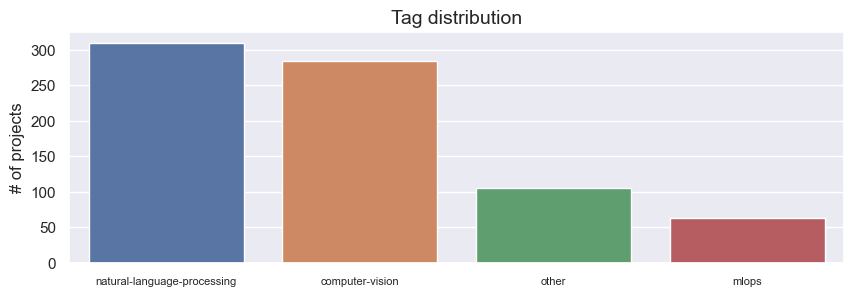

In [17]:
# Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

## Wordcloud

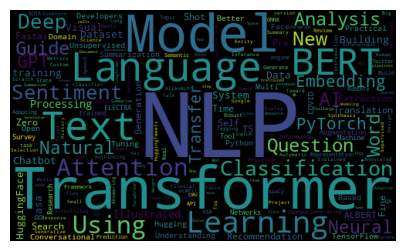

In [18]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

---
# [3] Data Preprocessing

## Missing values

- omit samples with missing values (if only a small subset are missing it)

In [ ]:
""" 
# Drop a row (sample) by index
df.drop([4, 10, ...])

# Conditionally drop rows (samples)
df = df[df.value > 0]

# Drop samples with any missing feature
df = df[df.isnull().any(axis=1)] 
"""

- omit the entire feature (if too many samples are missing the value)

In [ ]:
# Drop a column (feature)
""" df.drop(["A"], axis=1) """

- fill in missing values for features (using domain knowledge, heuristics, etc.)

In [ ]:
# Fill in missing values with mean
""" df.A = df.A.fillna(df.A.mean()) """

- may not always seem "missing" (ex. 0, null, NA, etc.)

In [ ]:
# Replace zeros to NaNs
""" import numpy as np
df.A = df.A.replace({"0": np.nan, 0: np.nan}) """

## Outliers (anomalies)

- craft assumptions about what is a "normal" expected value

In [ ]:
# Ex. Feature value must be within 2 standard deviations
""" df[np.abs(df.A - df.A.mean()) <= (2 * df.A.std())] """

- be careful not to remove important outliers (ex. fraud)

- values may not be outliers when we apply a transformation (ex. power law)

- anomalies can be global (point), contextual (conditional) or collective (individual points are not anomalous and the collective group is an outlier)


## Cleaning

Cleaning our data involves apply constraints to make it easier for our models to extract signal from the data.

- use domain expertise and EDA
- apply constraints via filters
- ensure data type consistency
- removing data points with certain or null column values
- images (crop, resize, clip, etc.)

In [ ]:
# Resize
""" import cv2
dims = (height, width)
resized_img = cv2.resize(src=img, dsize=dims, interpolation=cv2.INTER_LINEAR) """

- text (lower, stem, lemmatize, regex, etc.)

In [ ]:
# Lower case the text
# text = text.lower()

## Transformations

### Scaling

- required for models where the scale of the input affects the processes
- learn constructs from train split and apply to other splits (local)
- don't blindly scale features (ex. categorical features)
- standardization: rescale values to mean 0, std 1

In [ ]:
# Standardization
""" import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:\n", x)
print (f"mean: {np.mean(x):.2f}, std: {np.std(x):.2f}")
x_standardized = (x - np.mean(x)) / np.std(x)
print ("x_standardized:\n", x_standardized)
print (f"mean: {np.mean(x_standardized):.2f}, std: {np.std(x_standardized):.2f}") """

- min-max: rescale values between a min and max

In [ ]:
# Min-max
"""
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
print (f"min: {x.min():.2f}, max: {x.max():.2f}")
x_scaled = (x - x.min()) / (x.max() - x.min())
print ("x_scaled:", x_scaled)
print (f"min: {x_scaled.min():.2f}, max: {x_scaled.max():.2f}")
"""

- binning: convert a continuous feature into categorical using bins

In [ ]:
# Binning
"""
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
bins = np.linspace(0, 1, 5) # bins between 0 and 1
print ("bins:", bins)
binned = np.digitize(x, bins)
print ("binned:", binned)
"""

## Extraction

- signal extraction from existing features
- combine existing features
- transfer learning: using a pretrained model as a feature extractor and finetuning on it's results
- autoencoders: learn to encode inputs for compressed knowledge representation
- principle component analysis (PCA): linear dimensionality reduction to project data in a lower dimensional space.

In [ ]:
# PCA
"""
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, 3], [-2, -1, 2], [-3, -2, 1]])
pca = PCA(n_components=2)
pca.fit(X)
print (pca.transform(X))
print (pca.explained_variance_ratio_)
print (pca.singular_values_)
"""

- counts (ngram): sparse representation of text as matrix of token counts — useful if feature values have lot's of meaningful, separable signal.

In [ ]:
# Counts (ngram)
"""
from sklearn.feature_extraction.text import CountVectorizer
y = [
    "acetyl acetone",
    "acetyl chloride",
    "chloride hydroxide",
]
vectorizer = CountVectorizer()
y = vectorizer.fit_transform(y)
print (vectorizer.get_feature_names())
print (y.toarray())
# 💡 Repeat above with char-level ngram vectorizer
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3)) # uni, bi and trigrams
"""

- similarity: similar to count vectorization but based on similarities in tokens

## Implementation

In [ ]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

### Feature engineering

We can combine existing input features to create new meaningful signal for helping the model learn. However, there's usually no simple way to know if certain feature combinations will help or not without empirically experimenting with the different combinations. Here, we could use a project's title and description separately as features but we'll combine them to create one input feature.

In [ ]:
# Input
""" df["text"] = df.title + " " + df.description """

## Cleaning

Since we're dealing with text data, we can apply some common text preprocessing operations. Here, we'll be using Python's built-in regular expressions library re and the Natural Language Toolkit nltk.

In [ ]:
""" nltk.download("stopwords")
STOPWORDS = stopwords.words("english") """

In [ ]:
""" def clean_text(text, stopwords=STOPWORDS):
    '''Clean raw text string.'''
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text """

In [ ]:
# Apply to dataframe
"""
original_df = df.copy()
df.text = df.text.apply(clean_text)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")
"""

In [ ]:
# DataFrame cleanup
"""
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols
df.head() 
"""

In [ ]:
# Label to index
"""
tags = train_df.tag.unique().tolist()
num_classes = len(tags)
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index 
"""

In [ ]:
# Encode labels
""" df["tag"] = df["tag"].map(class_to_index)
df.head() """

In [ ]:
""" def decode(indices, index_to_class):
    return [index_to_class[index] for index in indices] """

In [ ]:
""" index_to_class = {v:k for k, v in class_to_index.items()}
decode(df.head()["tag"].values, index_to_class=index_to_class) """

## Tokenizer

In [ ]:
""" import numpy as np
from transformers import BertTokenizer """

In [ ]:
""" # Bert tokenizer
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
text = "Transfer learning with transformers for text classification."
encoded_inputs = tokenizer([text], return_tensors="np", padding="longest")  # pad to longest item in batch
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])
print (tokenizer.decode(encoded_inputs["input_ids"][0])) """

In [ ]:
""" def tokenize(batch):
    tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", return_dict=False)
    encoded_inputs = tokenizer(batch["text"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=encoded_inputs["input_ids"], masks=encoded_inputs["attention_mask"], targets=np.array(batch["tag"])) """

In [ ]:
# Tokenization
""" tokenize(df.head(1)) """

## Best practices

In [ ]:
""" def preprocess(df, class_to_index):
    '''Preprocess the data.'''
    df["text"] = df.title + " " + df.description  # feature engineering
    df["text"] = df.text.apply(clean_text)  # clean text
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
    df = df[["text", "tag"]]  # rearrange columns
    df["tag"] = df["tag"].map(class_to_index)  # label encoding
    outputs = tokenize(df)
    return outputs """

In [ ]:
# Apply
""" preprocess(df=train_df, class_to_index=class_to_index) """